In [35]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [36]:
file_path = 'D:/Classes/Python/Case Studies/Python Foundation Case Study 2 - Credit Card Case Study/'
Repayment = pd.read_csv(file_path + 'Repayment.csv',usecols = ['Customer', 'Month', 'Amount'])
Repayment.dropna(axis = 1, how = 'all', inplace = True)
Repayment.dropna(axis = 0, how = 'all', inplace = True)
Repayment.Month = pd.to_datetime(Repayment.Month)
Customer_Acqusition = pd.read_csv(file_path + 'Customer Acqusition.csv',
                                  usecols = ['Customer','Age', 'City', 'Product', 'Limit', 'Company', 'Segment'])
spend = pd.read_csv(file_path + 'spend.csv',usecols = ['Customer', 'Month', 'Type', 'Amount'])
spend.Month = pd.to_datetime(spend.Month)

In [37]:
Repayment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Customer  1500 non-null   object        
 1   Month     1500 non-null   datetime64[ns]
 2   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 46.9+ KB


In [38]:
Repayment.head(2)

,Customer,Month,Amount
0,A1,2004-01-12,495414.75
1,A1,2004-01-03,245899.02


In [39]:
Customer_Acqusition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Customer  100 non-null    object 
 1   Age       100 non-null    int64  
 2   City      100 non-null    object 
 3   Product   100 non-null    object 
 4   Limit     100 non-null    float64
 5   Company   100 non-null    object 
 6   Segment   100 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.6+ KB


In [40]:
Customer_Acqusition.head(2)

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


In [41]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Customer  1500 non-null   object        
 1   Month     1500 non-null   datetime64[ns]
 2   Type      1500 non-null   object        
 3   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 47.0+ KB


In [42]:
spend.head(2)

,Customer,Month,Type,Amount
0,A1,2004-01-12,JEWELLERY,485470.80
1,A1,2004-01-03,PETRO,410556.13


### 1. a) In case age is less than 18, replace it with mean of age values

In [43]:
Customer_Acqusition.loc[Customer_Acqusition.Age < 18, 'Age'] = Customer_Acqusition.Age.mean()
Customer_Acqusition.head()

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt
4,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary


### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
#### (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [44]:
Cust_spend = pd.merge(left = Customer_Acqusition, right = spend, how = 'inner', on = 'Customer')
Cust_spend.loc[Cust_spend.Amount > Cust_spend.Limit, 'Amount'] = 50/100 * Cust_spend.Limit
Cust_spend.head(2)

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13


In [45]:
Cust_spend.shape

(1500, 10)

### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [46]:
df = pd.merge(left = Cust_spend, right = Repayment , on = 'Customer', how = 'inner', suffixes = ('_Spend','_Repayment'))
df.loc[df.Amount_Repayment > df.Limit,'Amount_Repayment'] = df.Limit
df.head(2)

,Customer,Age,City,Product,Limit,Company,Segment,Month_Spend,Type,Amount_Spend,Month_Repayment,Amount_Repayment
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-12,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-03,245899.02


### 2. From the above dataset create the following summaries:
### a. How many distinct customers exist?

In [47]:
df.Customer.nunique()

100

### b. How many distinct categories exist?

In [48]:
df.Segment.unique()

array(['Self Employed', 'Salaried_MNC', 'Salaried_Pvt', 'Govt',
       'Normal Salary'], dtype=object)

### c. What is the average monthly spend by customers?

In [49]:
round(spend.groupby([spend.Month.dt.year, spend.Month.dt.strftime('%B')]).Amount.mean(),2)

Month  Month    
2004   April        235272.04
       February     221215.27
       January      251712.07
       March        232146.12
       May          217539.24
       November     270486.40
       September    310923.38
2005   April        252181.33
       August       233734.63
       December     147503.06
       February     229802.28
       January      292741.37
       July         229116.66
       June         262688.11
       May          245696.52
       November     286143.32
       October      194568.64
       September    188666.20
2006   April        232468.97
       August       240699.72
       December     270470.98
       February     253858.26
       January      282058.01
       July         287505.10
       June         177252.39
       March        247166.08
       May          236162.74
       November     182841.29
       October      236136.33
       September    158520.09
Name: Amount, dtype: float64

### d. What is the average monthly repayment by customers?

In [50]:
round(Repayment.groupby([Repayment.Month.dt.year, Repayment.Month.dt.strftime('%B')]).Amount.mean(),2)

Month  Month    
2004   April        259141.68
       February     256702.63
       January      243489.65
       March        252585.28
       May          226162.72
       November     209592.24
       September    184487.85
2005   April        212688.63
       August       264430.92
       December     320379.34
       February     238829.27
       January      240548.10
       July         239871.48
       June         210199.82
       May          263207.37
       November     256695.12
       October      219849.96
       September    247700.17
2006   April        275472.25
       August       224143.99
       December     252736.57
       February     284489.57
       January      293475.39
       July         257936.38
       June         251990.45
       March        240851.27
       May          256920.88
       November     199399.20
       October      260765.48
       September    262533.88
Name: Amount, dtype: float64

### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 
#### (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [51]:
df['Year'] = df.Month_Repayment.dt.year
df['Month'] = df.Month_Repayment.dt.strftime('%B')

In [52]:
df2 = df.groupby(['Year','Month'])[['Amount_Spend','Amount_Repayment']].sum()
df2.rename(columns = {'Amount_Spend' : 'Monthly_Spend', 'Amount_Repayment' : 'Monthly_Repayment'}, inplace = True)
df2['Monthly_Profit'] = df2.Monthly_Repayment - df2.Monthly_Spend
df2['Bank_Int_Earned'] = 2.9/100 * df2.Monthly_Repayment
df2.loc[df2.Monthly_Profit < 0,'Bank_Int_Earned'] = np.NaN
df2

Monthly_Spend  Monthly_Repayment  Monthly_Profit  \
Year Month                                                         
2004 April       1.194516e+08       1.614421e+08    4.199046e+07   
     February    7.613922e+07       7.700939e+07    8.701628e+05   
     January     1.088357e+09       1.149001e+09    6.064404e+07   
     March       5.594171e+07       6.846315e+07    1.252144e+07   
     May         8.800456e+07       9.374240e+07    5.737846e+06   
     November    5.504612e+07       4.881163e+07   -6.234484e+06   
     September   5.144278e+07       5.561745e+07    4.174674e+06   
2005 April       9.366405e+07       1.059391e+08    1.227504e+07   
     August      1.361400e+08       1.524504e+08    1.631034e+07   
     December    4.348638e+07       5.634163e+07    1.285525e+07   
     February    5.890557e+08       6.618121e+08    7.275641e+07   
     January     1.324129e+08       1.410175e+08    8.604553e+06   
     July        3.995653e+07       4.957738e+07    9.620854e+06   
     June        1.174019e+08       1.019899e+08   -1.541193e+07   
     May         7.149030e+08       8.550610e+08    1.401580e+08   
     November    1.532278e+08       1.877526e+08    3.452474e+07   
     October     3.140993e+07       4.396204e+07    1.255211e+07   
     September   3.195551e+07       2.356691e+07   -8.388598e+06   
2006 April       3.229722e+08       3.942069e+08    7.123464e+07   
     August      5.849630e+07       5.670471e+07   -1.791590e+06   
     December    4.585222e+07       5.993854e+07    1.408632e+07   
     February    1.654843e+08       1.956890e+08    3.020471e+07   
     January     5.127574e+07       6.073676e+07    9.461014e+06   
     July        1.444093e+08       1.685954e+08    2.418606e+07   
     June        5.302118e+07       5.194287e+07   -1.078319e+06   
     March       7.393854e+08       7.391182e+08   -2.671747e+05   
     May         3.297954e+08       3.652488e+08    3.545340e+07   
     November    1.124836e+08       9.614997e+07   -1.633367e+07   
     October     5.285823e+07       6.174965e+07    8.891422e+06   
     September   5.395681e+07       6.168156e+07    7.724755e+06   

                Bank_Int_Earned  
Year Month                       
2004 April         4.681820e+06  
     February      2.233272e+06  
     January       3.332103e+07  
     March         1.985431e+06  
     May           2.718530e+06  
     November               NaN  
     September     1.612906e+06  
2005 April         3.072234e+06  
     August        4.421061e+06  
     December      1.633907e+06  
     February      1.919255e+07  
     January       4.089507e+06  
     July          1.437744e+06  
     June                   NaN  
     May           2.479677e+07  
     November      5.444825e+06  
     October       1.274899e+06  
     September              NaN  
2006 April         1.143200e+07  
     August                 NaN  
     December      1.738218e+06  
     February      5.674982e+06  
     January       1.761366e+06  
     July          4.889266e+06  
     June                   NaN  
     March                  NaN  
     May           1.059221e+07  
     November               NaN  
     October       1.790740e+06  
     September     1.788765e+06

### f. What are the top 5 product types?

In [53]:
spend.groupby('Type').Amount.sum().sort_values(ascending = False).head(5)

Type
PETRO           49863174.09
CAMERA          41481571.96
FOOD            37773338.43
TRAIN TICKET    33067077.15
AIR TICKET      32955445.42
Name: Amount, dtype: float64

###  g. Which city is having maximum spend?

In [54]:
df.groupby('City').Amount_Spend.sum().sort_values(ascending = False).head(1)

City
COCHIN    1.175903e+09
Name: Amount_Spend, dtype: float64

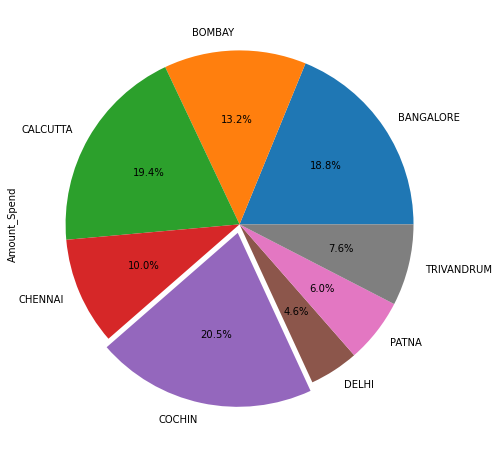

In [55]:
plt.figure(figsize = (10,8))
df.groupby('City').Amount_Spend.sum().plot(kind = 'pie', autopct = '%1.1f%%',explode=[0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0])
plt.show()

### h. Which age group is spending more money?

In [56]:
df.loc[:,'Age_Group'] = pd.Series(np.where(df.Age <= 24, 'Youth', np.where(df.Age < 60, 'Adult','Senior')))

In [57]:
df.groupby('Age_Group').Amount_Spend.sum()

Age_Group
Adult     4.216583e+09
Senior    1.117700e+09
Youth     4.137042e+08
Name: Amount_Spend, dtype: float64

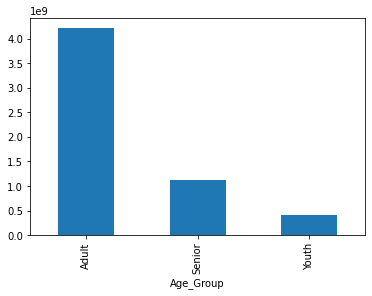

In [58]:
df.groupby('Age_Group').Amount_Spend.sum().plot(kind = 'bar')
plt.show()

### i. Who are the top 10 customers in terms of repayment?

In [59]:
df.groupby('Customer').Amount_Repayment.sum().sort_values(ascending = False).head(10)

Customer
A61    4.004874e+08
A60    3.752990e+08
A13    2.967320e+08
A43    2.631860e+08
A45    2.618984e+08
A12    2.583776e+08
A14    2.462413e+08
A44    2.400866e+08
A39    2.362970e+08
A42    2.360793e+08
Name: Amount_Repayment, dtype: float64

### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [60]:
df.pivot_table(index = ['Month_Spend','City'], columns = 'Product', values = 'Amount_Spend', aggfunc = 'sum')

Product                        Gold     Platimum      Silver
Month_Spend City                                            
2004-01-03  BANGALORE   39834958.77   6022459.87  4650055.50
            BOMBAY      33056369.42   3240090.00  4950000.00
            CALCUTTA    58321033.84   1580305.74  1500019.00
            CHENNAI     12687055.38  28884337.57  2291835.60
            COCHIN      42260908.55  24452747.42  1978991.46
...                             ...          ...         ...
2006-12-03  CALCUTTA            NaN          NaN   950019.00
            CHENNAI             NaN   4248937.13         NaN
            COCHIN       5342338.80    920040.00         NaN
            DELHI       10508353.69          NaN         NaN
            TRIVANDRUM   9126235.17          NaN         NaN

[489 rows x 3 columns]

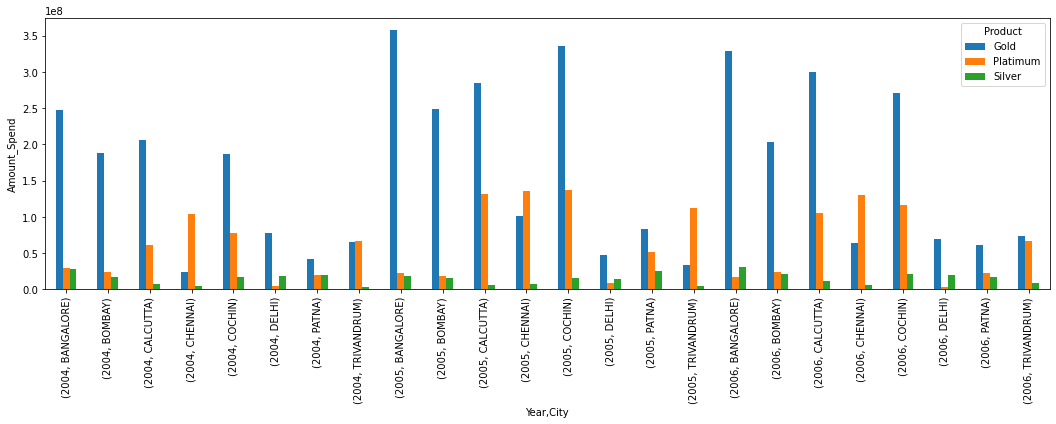

In [61]:
df.pivot_table(index = [df.Month_Spend.dt.year,'City'], columns = 'Product',
               values = 'Amount_Spend', aggfunc = 'sum').plot(kind = 'bar', figsize = (18,5))
plt.xlabel('Year,City')
plt.ylabel('Amount_Spend')
plt.show()

## 4. Create graphs for
### a. Monthly comparison of total spends, city wise

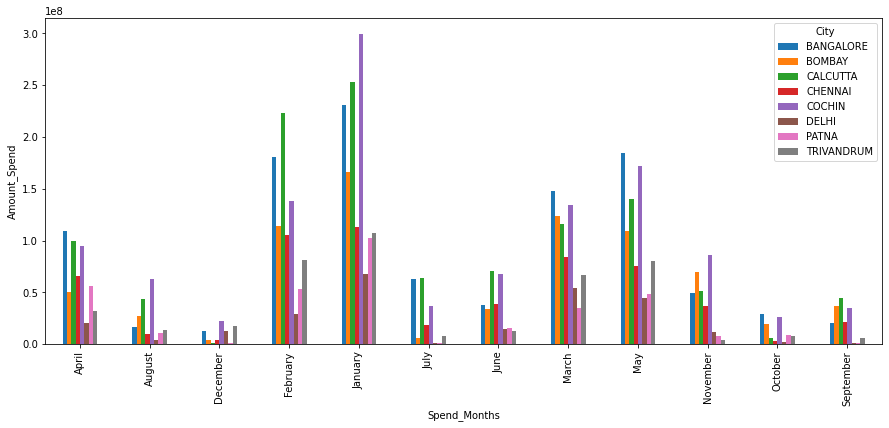

In [62]:
df.pivot_table(index = df.Month_Spend.dt.strftime('%B'), columns = 'City',
               values = 'Amount_Spend', aggfunc = 'sum').plot(kind = 'bar', figsize = (15,6))
plt.xlabel('Spend_Months')
plt.ylabel('Amount_Spend')
plt.show()

### b. Comparison of yearly spend on air tickets

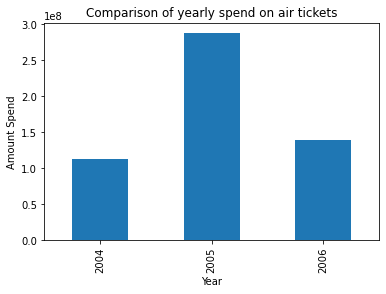

In [63]:
df3 = df.loc[df.Type == 'AIR TICKET',['Month_Spend','Type','Amount_Spend']]
df3.groupby(df3.Month_Spend.dt.year).Amount_Spend.sum().plot(kind = 'bar')
plt.title('Comparison of yearly spend on air tickets')
plt.ylabel('Amount Spend')
plt.xlabel('Year')
plt.show()

### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

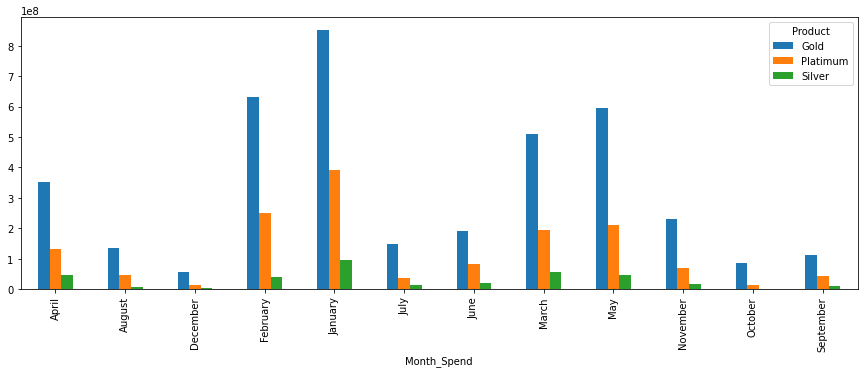

In [64]:
df.pivot_table(index = df.Month_Spend.dt.strftime('%B'), columns = 'Product',
               values = 'Amount_Spend', aggfunc = 'sum').plot(kind = 'bar', figsize = (15,5))
plt.show()

# highest amount was spent in the month of January by the customers on the products

## 5. Write user defined PYTHON function to perform the following analysis:
### You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [78]:
customer_repay = pd.merge(left = Customer_Acqusition, right = Repayment, how = 'inner', on = 'Customer')
customer_repay.loc[:,'Yearly'] = cust_repay.Month.dt.year
customer_repay.loc[:,'Monthly'] = cust_repay.Month.dt.strftime('%B')

In [79]:
customer_repay.head(2)

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount,Yearly,Monthly
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,2004,January
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02,2004,January


In [102]:
def func(product, period):
    
    if product.lower() == 'gold' and period.lower() == 'monthly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',values='Amount',aggfunc='sum')
        result = pivot.loc[('Gold',['BANGALORE', 'CALCUTTA', 'COCHIN', 'BOMBAY', 'DELHI', 'PATNA','CHENNAI', 'TRIVANDRUM']),:]
    
    elif product.lower() == 'gold' and period.lower() == 'yearly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',values='Amount',aggfunc='sum')
        result = pivot.loc[('Gold',['BANGALORE', 'CALCUTTA', 'COCHIN', 'BOMBAY', 'DELHI', 'PATNA','CHENNAI', 'TRIVANDRUM']),:]
    
    elif product.lower() == 'silver' and period.lower() == 'monthly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',values='Amount',aggfunc='sum')
        result = pivot.loc[('Silver',['BANGALORE', 'CALCUTTA', 'COCHIN', 'BOMBAY', 'DELHI', 'PATNA','CHENNAI', 'TRIVANDRUM']),:]
    
    elif product.lower() == 'silver' and period.lower() == 'yearly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',values='Amount',aggfunc='sum')
        result = pivot.loc[('Silver',['BANGALORE', 'CALCUTTA', 'COCHIN', 'BOMBAY', 'DELHI', 'PATNA','CHENNAI', 'TRIVANDRUM']),:]
    
    elif product.lower() == 'platimum' and period.lower() == 'monthly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',values='Amount',aggfunc='sum')
        result = pivot.loc[('platimum',['BANGALORE','CALCUTTA','COCHIN','BOMBAY', 'DELHI', 'PATNA','CHENNAI', 'TRIVANDRUM']),:]
    
    elif product.lower() == 'platimum' and period.lower() == 'yearly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',values='Amount',aggfunc='sum')
        result = pivot.loc[('platimum',['BANGALORE','CALCUTTA','COCHIN','BOMBAY', 'DELHI', 'PATNA','CHENNAI', 'TRIVANDRUM']),:]
    
    return result

In [103]:
func('gold','yearly')

Yearly                             2004        2005        2006
Product City       Customer                                    
Gold    BANGALORE  A1        2359797.84  1529158.77   864735.06
                   A13       2337012.77  3757673.00  3477314.89
                   A14       2770261.30  2491981.61  2681025.72
                   A30        978777.17  2667746.38  2486958.41
                   A43       1906497.47  4006956.60  2576417.39
                   A63        788855.60         NaN   211117.12
                   A81              NaN         NaN   207780.32
                   A88              NaN         NaN   146821.30
                   A92              NaN         NaN   459105.69
        CALCUTTA   A10        892190.53  1246843.93  1556613.06
                   A15       1051502.61  1720768.79  2783141.43
                   A29       1376793.94  1706779.22  3434298.00
                   A31        407599.13  1448641.71  1527798.41
                   A60       2890721.81  3742856.10  3242712.83
                   A89              NaN         NaN   497237.97
        COCHIN     A11        958556.39  2045470.88  2306906.76
                   A16       1122211.16  1226247.16  1911369.63
                   A32        344312.67   696673.46  1517308.65
                   A45       2557947.39  4042447.57  1847939.91
                   A61       2518154.95  4276860.55  3744127.41
                   A65        468922.60   230667.34         NaN
                   A90              NaN         NaN   109931.32
                   A94        153465.89         NaN         NaN
        BOMBAY     A12       2339080.90  2877588.30  3118090.96
                   A17       1425448.02   731143.83  3127783.14
                   A42       3045914.71  3125758.43  1443787.72
                   A62       1744114.25  1541617.21  1684085.69
                   A91              NaN         NaN   247781.00
        DELHI      A44       2149383.50  4165317.77  1430028.85
                   A64              NaN         NaN   323229.09
                   A82              NaN         NaN   342200.74
                   A93        342326.14         NaN         NaN
        PATNA      A26       1490427.84  2433837.95  3330421.30
                   A66        477039.78         NaN   113094.58
                   A95        369405.96         NaN         NaN
        CHENNAI    A27       1842823.04  2782591.71  2387485.81
                   A67         67845.60    55638.77         NaN
        TRIVANDRUM A28        965108.49  2827009.82  3376614.65